<a href="https://colab.research.google.com/github/MaricelaMH/SIMULACION-II/blob/main/Caminantes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#M É T O D O - M E T R O P O L I S - HASTINGS - 2D

Este método pertenece a la clase de algoritmos de Monte Carlo con cadenas de Markov. Es útil en situaciones donde la distribución objetivo es difícil de muestrear directamente. En un espacio bidimensional (2D), el algoritmo se adapta para muestrear sobre dos variables.
El enfoque es el mismo que en una dimensión, pero ahora el muestreo y las propuestas se hacen en el plano bidimensional $(x,y)$.

Veamos el comportamiento del método con los siguientes ejemplos.

# EJEMPLO 1: Distribución Normal Bivariada

Describe dos variables aleatorias continuas que siguen una distribución normal conjunta. Se caracteriza por medias, varianzas y una correlación que mide la relación lineal entre las variables.

La función de densidad conjunta de dicha distribución es:

$$f(x,y)= \frac{1}{2\pi\sigma_x\sigma_y\sqrt{1-\rho^2}}exp(-\frac{1}{2(1-\rho^2)} [ \frac{(x-\mu_x)^2}{\sigma^2_x}+\frac{(y-\mu_y)^2}{\sigma^2_y}-\frac{2\rho(x-\mu_x)(y-\mu_y)}{\sigma_x\sigma_y}]) $$

con:
* $\mu_x$ y $\mu_y$: medias de las variables $X$ y $Y$
* $\sigma^2_x$ y $\sigma^2_y$: varianzas de $X$ y $Y$
* $\rho$: coeficiente de correlación que mide la relación lineal entre $X$ y $Y$

In [1]:
# Importamos las librerias necesarias

%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
import scipy.stats as st           # Proporciona funciones estadísticas
from itertools import accumulate   # Sirve para acumular valores en listas.
import numpy as np
import math
from mpl_toolkits.mplot3d import Axes3D  # Herramientas para gráficos en 3D

In [2]:
# Definimos nuestra función para la Distribución Normal Bivariada
def bivariate_normal(X, Y, sigmax=1.0, sigmay=1.0,
                 mux=0.0, muy=0.0, sigmaxy=0.0):
    """
    Bivariate Gaussian distribution for equal shape *X*, *Y*.
    See `bivariate normal
    <http://mathworld.wolfram.com/BivariateNormalDistribution.html>`_
    at mathworld.
    """
    Xmu = X-mux  # Diferencia entre X y la media en X
    Ymu = Y-muy  # Diferencia entre Y y la media en Y

    rho = sigmaxy/(sigmax*sigmay)    # Correlación entre X y Y
    z = Xmu**2/sigmax**2 + Ymu**2/sigmay**2 - 2*rho*Xmu*Ymu/(sigmax*sigmay)   # Ecuación del exponente de la normal bivariada
    denom = 2*np.pi*sigmax*sigmay*np.sqrt(1-rho**2)  # Denominador normalizador
    return np.exp(-z/(2*(1-rho**2))) / denom  # Función de densidad de la distribución normal bivariada


* Plot_dist:La siguiente función se encarga de visualizar las muestras generadas en un gráfico bidimensional con líneas de contorno de densidad y los puntos muestreados

In [3]:
def plot_dist(x,y):
    ''' plotting environment we frequently use to visualise the
    sampling algorithms.'''

    sns.set_style('white') # Color del fondo
    plt.rcdefaults()

    # plot contour # Crear un gráfico conjunto con una densidad estimada
    g = sns.JointGrid(x=x, y=y, height=10).plot_joint(sns.kdeplot, n_levels=4, cmap="BuPu", shade=True, shade_lowest=False)

    # add scatter plot of data   # Añade los puntos de la muestra en el gráfico
    g = g.plot_joint(plt.scatter, c="r", s=30, linewidth=1)
    plt.plot(x, y, linestyle='-', marker='', alpha=0.4, )

    # set axis labels
    g.set_axis_labels("$X$", "$Y$")

* Traceplot: La siguinte función nos mostrara os valores acumulados del muestreo a lo largo del tiempo, la media acumulativa de los valores y una línea horizontal que representa el valor de la media real.

In [5]:
  def traceplot(x):
    '''traceplot in the x-dimension with the cumulative mean (r)
    and the actual mean (--)'''
    sns.tsplot(x)
    l = list(accumulate(x))
    nl = [v/i for i, v in enumerate(l,1)]
    plt.plot(nl, 'r')
    plt.axhline(y=0.0, color='k', linestyle='--')
    plt.ylabel('x')
    plt.xlabel('Iteration')

* Autocorrelación_plot: Esta función muestra la autocorrelación de los valores de $x$, es decir, qué tan relacionados están los valores actuales con los valores anteriores en la secuencia.

In [6]:
 def autocorrelation_plot(x, l):
    '''plots the autocorrelation of x to lag = l'''
    plt.acorr(x - np.mean(x), maxlags=l,  normed=True, usevlines=False);
    plt.xlim((0, 100))
    plt.ylabel('Autocorrelation')
    plt.xlabel('Lag')

In [7]:
# set mean and covariance for Q
mean = np.array([0, 1])
var = np.array([[1, .5], [.5, 1]])

* Himmelblau: Esta función devuelve el valor de la función de Himmelblau, que es una función comúnmente usada para evaluar algoritmos de optimización.

In [8]:
def  himmelblau(x,y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

Text(0.5, 0, '$\\pi(x,y)$')

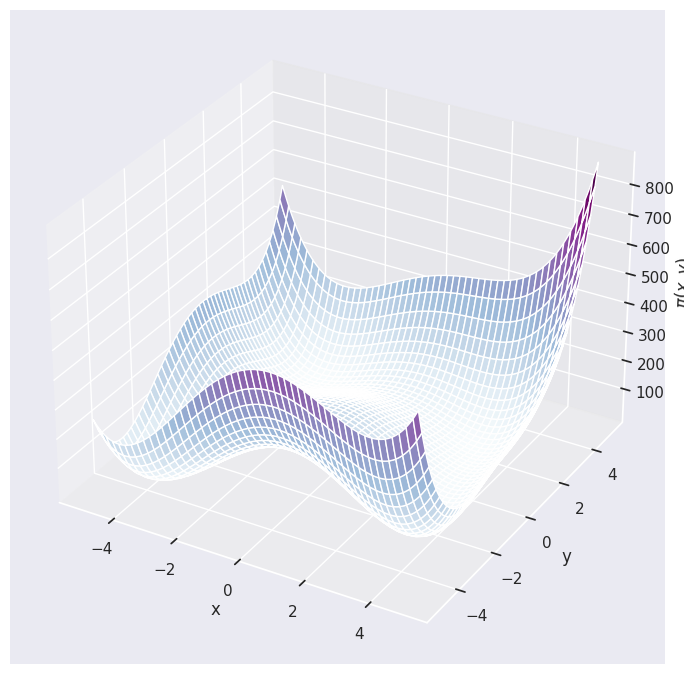

In [9]:
# Creamos la malla de un grafico en 3D
x, y = np.linspace(-5, 5, 200), np.linspace(-5, 5, 200)
X,Y = np.meshgrid(x,y)

# generate bivariate normal
#Z = bivariate_normal(X,Y,var[0][0],var[1][1],mean[0],mean[1]) #Distribucion normal
Z = himmelblau(X,Y)

# plot surface in 3D
fig = plt.figure(figsize=(12,8.5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap= 'BuPu')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('$\pi(x,y)$')

### Definimos la 2D distribución objetivo:

In [10]:
def ptarget(x, y):
    return st.multivariate_normal.pdf([x, y], mean=mean, cov=var)

### Construimos un método para el algoritmo Metropolis-Hastings, sus parámetros de entrada serán:
- p: distribución objetivo
- n: número de iteraciones del algoritmo
- x0, y0: punto de partida.
- step: tamaño del paso

In [11]:
def metropolis_hastings(p, n, x0, y0, step):
    x = x0
    y = y0

    points = np.zeros((n, 2)) # Lista inicial de muestras, al momento, con puros ceros

    for i in range(n):

        # Proponemos nuevos valores para el estado actual mediante el muestreo Q(x',y' | x,y)
        x_star, y_star = np.array([x, y]) + np.random.normal(scale=step,size=2)

        # Condición de Metropolis-Hastings
        if np.random.rand() < p(x_star, y_star) / p(x, y):
            x, y = x_star, y_star

        # Se actualiza la lista de muestras
        points[i] = np.array([x, y])

    return points

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1832: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1832: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)


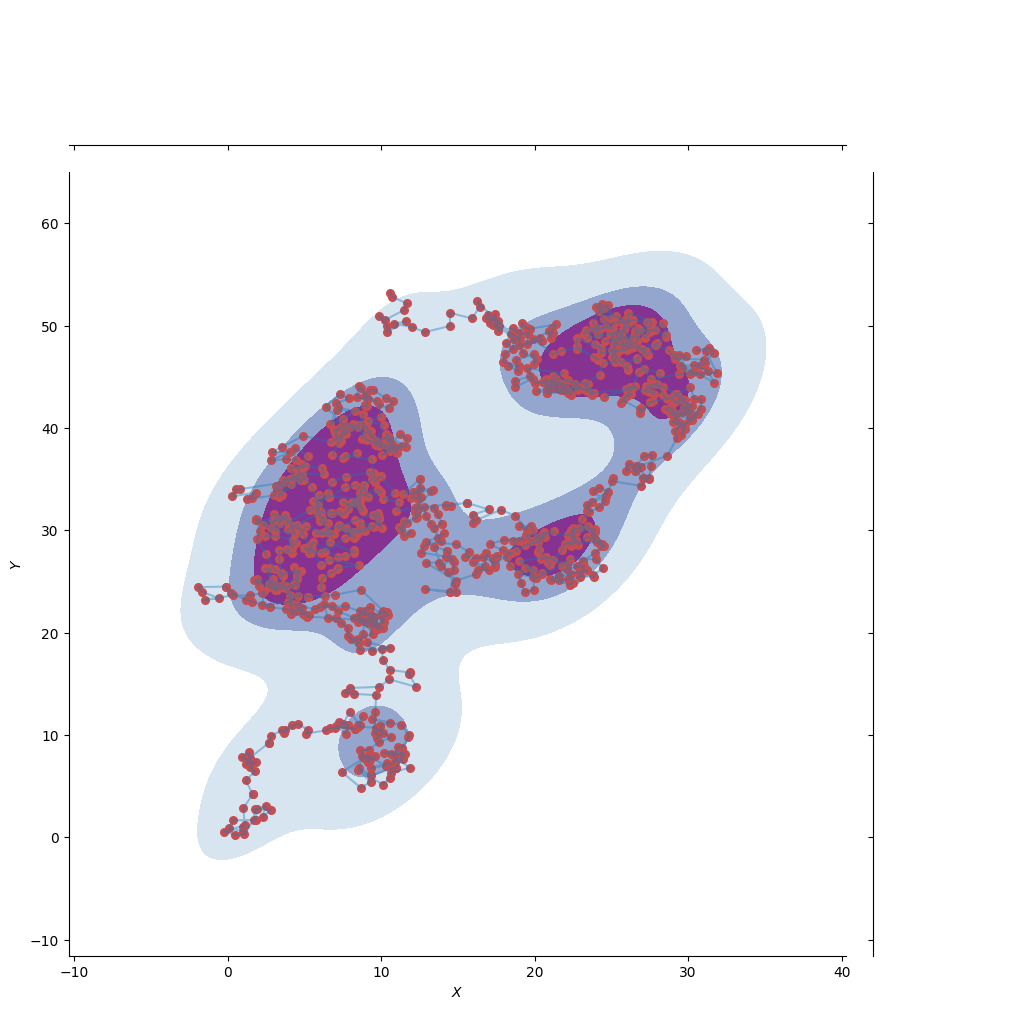

In [12]:
# generate the samples
samples = metropolis_hastings(himmelblau, 1000, 1, 1, 0.8) # Para himmelblau

# visualise
plot_dist(samples[:, 0], samples[:, 1])
plt.savefig('caminates.png')